Num GPUs Available:  0


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.HONF77_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.HONF77_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_iiit_pet',
    full_name='oxford_iiit_pet/4.0.0',
    description="""
    The Oxford-IIIT pet dataset is a 37 category pet image dataset with roughly 200
    images for each class. The images have large variations in scale, pose and
    lighting. All images have an associated ground truth annotation of breed and
    species. Additionally, head bounding boxes are provided for the training split,
    allowing using this dataset for simple object detection tasks. In the test
    split, the bounding boxes are empty.
    """,
    homepage='http://www.robots.ox.ac.uk/~vgg/data/pets/',
    data_dir='/root/tensorflow_datasets/oxford_iiit_pet/4.0.0',
    file_format=tfrecord,
    download_size=773.52 MiB,
    dataset_size=773.68 MiB,
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=string),
       

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 37)                  │           4,773 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,426,725 (9.26 MB)

 Trainable params: 168,741 (659.14 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.2682 - loss: 2.7727 - val_accuracy: 0.8234 - val_loss: 0.6917
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.7609 - loss: 0.8015 - val_accuracy: 0.8533 - val_loss: 0.4724
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.8435 - loss: 0.5221 - val_accuracy: 0.8764 - val_loss: 0.4121
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.8705 - loss: 0.3987 - val_accuracy: 0.8764 - val_loss: 0.3713
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.8985 - loss: 0.3192 - val_accuracy: 0.8696 - val_loss: 0.3761
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9155 - loss: 0.2668 - val_accuracy: 0.8682 - val_loss: 0.3481
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.9242 - loss: 0.2338 - val_accuracy: 0.8872 - val_loss: 0.3329
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9407 - loss: 0.1867 - val_accuracy: 0.8832 - v

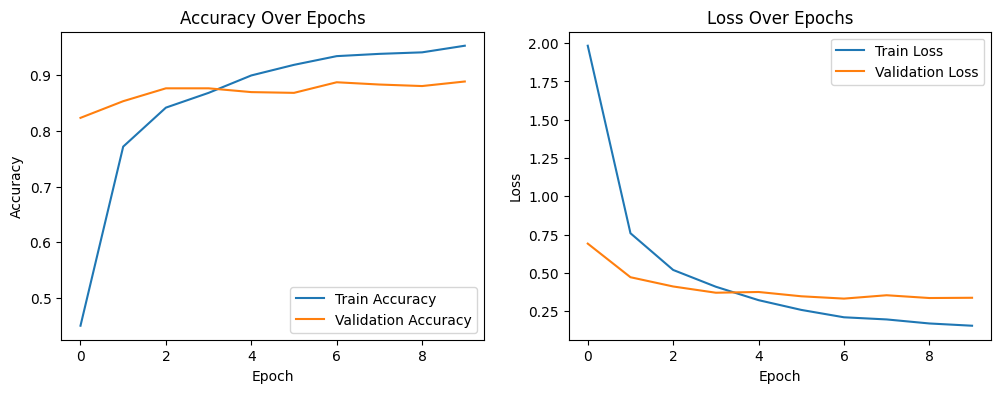

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Load the Oxford-IIIT Pet dataset from TensorFlow Datasets
# I used 'as_supervised=True' to get (image, label) pairs
(ds_train, ds_val), ds_info = tfds.load(
    'oxford_iiit_pet',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

print(ds_info)

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Function to preprocess images: resize and normalize
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

ds_val = ds_val.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_val = ds_val.batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

NUM_CLASSES = ds_info.features['label'].num_classes
print("Number of classes:", NUM_CLASSES)

# Build the model using transfer learning with MobileNetV2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Create the full model
inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
EPOCHS = 10
history = model.fit(ds_train, epochs=EPOCHS, validation_data=ds_val)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(ds_val)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
